In [76]:
import pandas as pd
!pip install shap

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('https://raw.githubusercontent.com/sachitwagle99/INFO6105_Assignments/main/Customer%20Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [80]:
from sklearn.preprocessing import StandardScaler

In [82]:
df.dropna(inplace=True)

In [84]:
X=df.drop('Churn',axis=1)
y = df['Churn']

In [86]:
import shap
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [90]:
X_test=scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import shap

In [94]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
print(f'Training Accuracy : {accuracy_score(y_train,y_pred)}\n')
print(f'Testing Accuracy : {accuracy_score(y_test,y_pred_test)}\n')
print(f'Training Confusion Matrix :\n {confusion_matrix(y_train,y_pred)}\n')
print(f'Testing Confusion Matrix :\n {confusion_matrix(y_test,y_pred_test)}\n')

Training Accuracy : 0.8950042337002541

Testing Accuracy : 0.8959390862944162

Training Confusion Matrix :
 [[1946   45]
 [ 203  168]]

Testing Confusion Matrix :
 [[656   8]
 [ 74  50]]



<Axes: ylabel='Feature'>

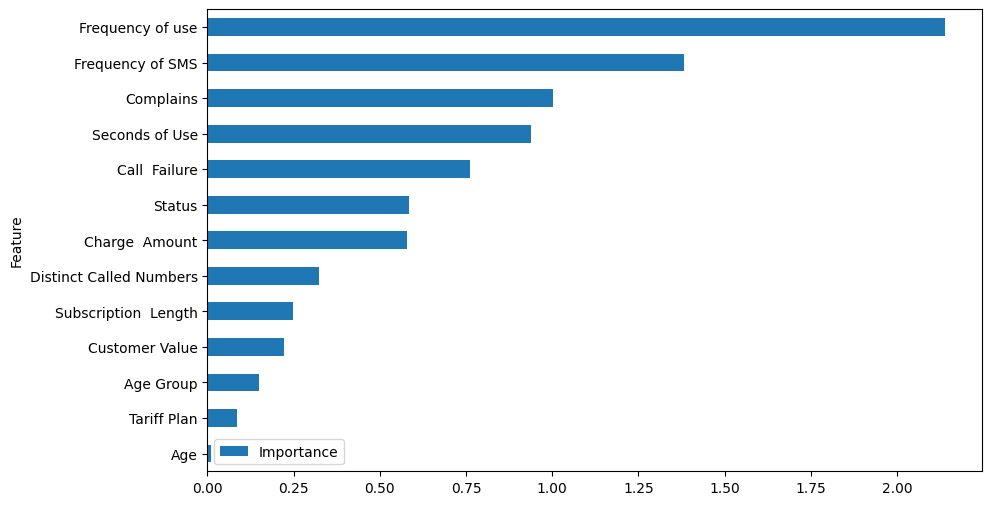

In [96]:
coefficients = lr.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [98]:
explainer=shap.Explainer(lr.predict,X_train)
shap_values=explainer(X_test)

PermutationExplainer explainer: 789it [00:17, 19.97it/s]                         


In [ ]:
shap.initjs()

In [ ]:
def sample_feature_imp(idx,type='condensed'):
  if type == 'condensed':
    return shap.plots.force(shap_values[idx])
  elif type == 'waterfall':
    return shap.plots.waterfall(shap_values[idx])
  else return 'Error'

In [ ]:
sample_feature_imp(0,'waterfall')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr=RandomForestClassifier()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
print(f'Training Accuracy : {accuracy_score(y_train,y_pred)}\n')
print(f'Testing Accuracy : {accuracy_score(y_test,y_pred_test)}\n')
print(f'Training Confusion Matrix :\n {confusion_matrix(y_train,y_pred)}\n')
print(f'Testing Confusion Matrix :\n {confusion_matrix(y_test,y_pred_test)}\n')

In [ ]:
coefficients = lr.feature_importances_
avg_importance = coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [72]:
explainer=shap.Explainer(lr.predict,X_train)
shap_values=explainer(X_test)

PermutationExplainer explainer: 789it [06:45,  1.92it/s]


In [ ]:
shap.initjs()

In [ ]:
sample_feature_imp(0,'waterfall')

In [ ]:
pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()
h2odata=h2o.H2OFrame(df)

In [ ]:
h2odata.head()

In [ ]:
train,test=h2odata.split_frame(destination_frames=['train.hex','test.hex'])

In [ ]:
aml=H2OAutoML(max_models=10,seed=1,sort_metric='MAE')
aml.train(x=list(set(list(train.columns))-set('Churn')),y='Churn',training_frame=train)

In [ ]:
leader=aml.leaderboard
print(leader)

In [ ]:
bestmodel=aml.leader
bestmodel.model_performance(test)
bestmodel.varimp_plot()

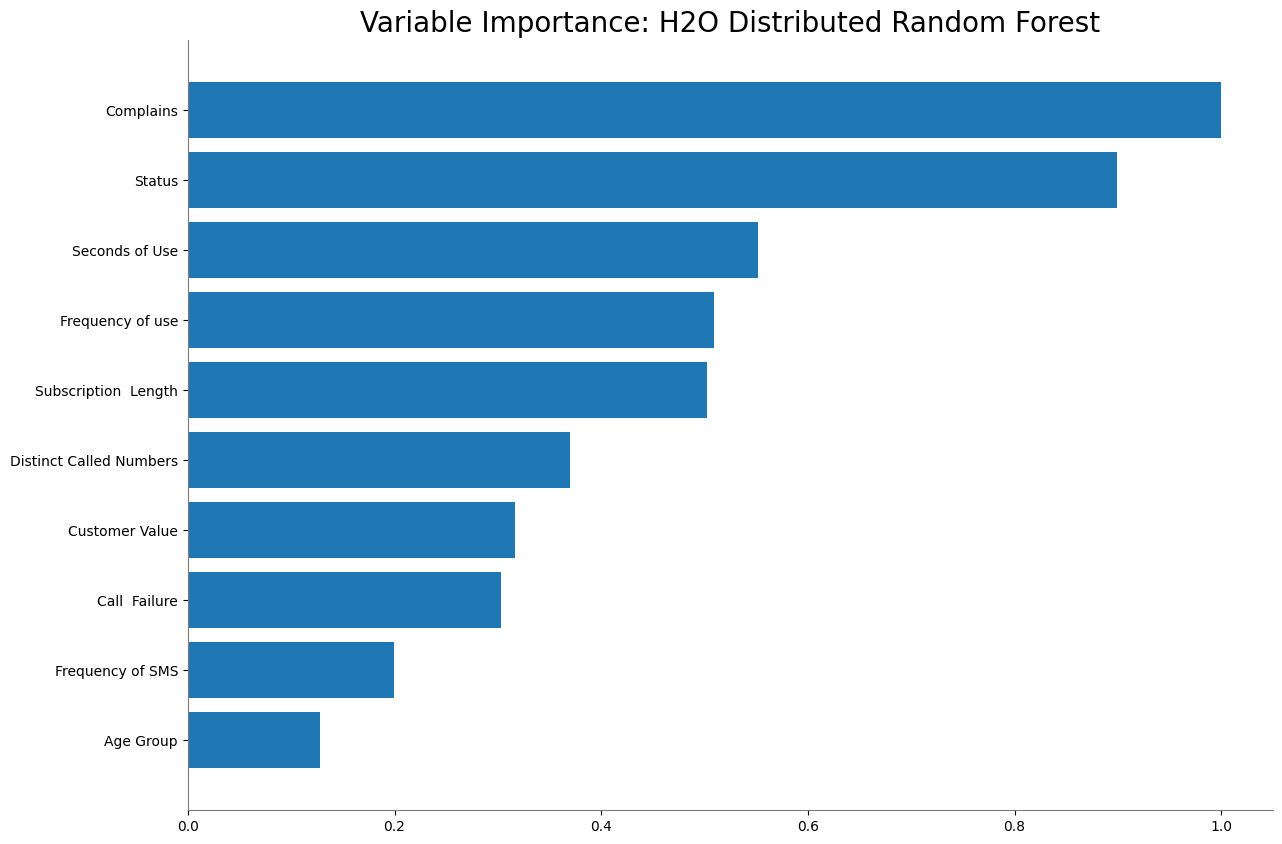

<Figure size 640x480 with 0 Axes>